### Filmes e Séries
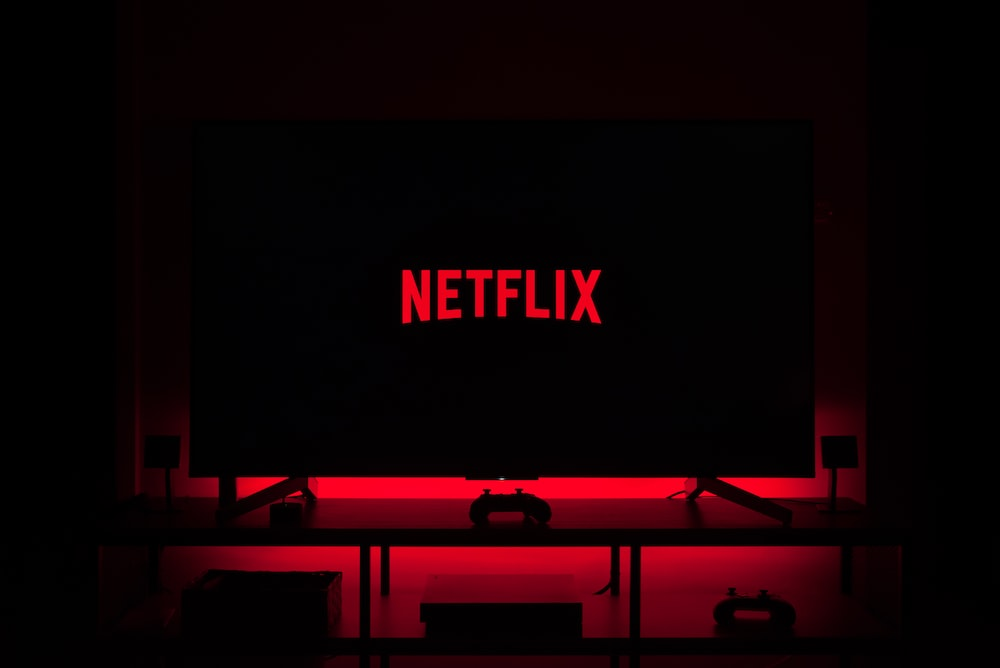

### Sobre a base e o objetivo desta análise
A Netflix é uma das plataformas mais populares de streaming no mundo, com milhares de séries e filmes disponíveis. A análise exploratória a seguir faz uso de uma base de dados disponível no [kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download), contendo uma lista de filmes e séries disponíveis na plataforma, com dados como elenco, diretores, ano de lançamento, duração etc. Esta análise faz parte da primeira atividade avaliativa para a disciplina de data science, onde tive a liberdade de escolher uma base de dados para explorá-la a fim de obter insights e aplicar os conhecimentos da disciplina.


### Importando as bibliotecas necessárias e a base

In [ ]:
# Importando as bibliotecas
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [ ]:
from google.colab import files # Importando a base para usar no Google Colab
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
# Lendo o arquivo
df = pd.read_csv('netflix_titles.csv')

### Explorando os dados

In [ ]:
# Observando o topo da base
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Observando as dimensões da tabela
print('A tabela possui', df.shape[0], 'linhas e', df.shape[1], 'colunas.')

A tabela possui 8807 linhas e 12 colunas.


In [ ]:
# Observando as colunas
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Analisando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Contando os nulos em cada coluna
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Conteúdo observado:
A tabela possui 8807 linhas e 12 colunas, dentre as quais:
- show_id: representa o identificador único de séries/filmes 
- type: indica se é série ou filme
- title: título da mídia
- director: diretor da mídia
- cast: elenco da mídia
- country: país de produção
- date_added: data de adição à Netflix
- release_year: ano de lançamento da mídia
- rating: classificação indicativa
- duration: duração da mídia (minutos para filmes e temporadas para séries)
- listed_in: gênero da mídia
- description: descrição da mídia

Com exceção de release_year, todos os atributos são strings, além disso director, cast e country possuem um alto valor de nulos.

### Visualizando os dados

O gráfico de pizza a seguir mostra que existe mais do que o dobro de filmes do que séries.

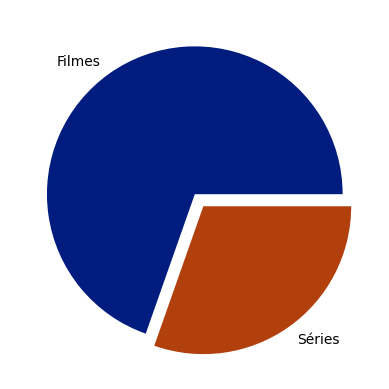

In [ ]:
# Gráfico de pizza para filmes e séries
pieType = df['type'].value_counts()
legenda = ['Filmes', 'Séries']
palette_color = sns.color_palette('dark')
explode = [0, 0.1]
plt.pie(pieType, labels=legenda, colors=palette_color, explode=explode)
plt.show()


O histograma mostrou uma distribuição assimétrica para o ano de lançamento de mídias, evidenciando o aumento drástico por volta de 2010.

In [ ]:
# Criando uma cópia da coluna release_year para tratamento
df_NotNullRY = df['release_year'].copy()


In [ ]:
# Excluindo os valores nulos
df_NotNullRY.dropna(inplace=True)

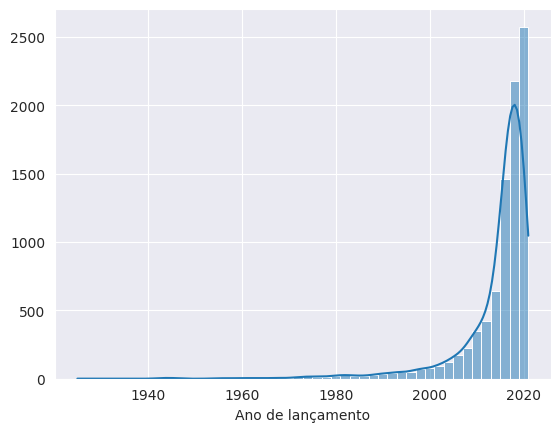

In [ ]:
# Histograma para análise de lançamentos
sns.set_style('darkgrid')
sns.histplot(df_NotNullRY, kde=True, binwidth=2)
plt.xlabel('Ano de lançamento')
plt.ylabel('')
plt.show()

In [ ]:
# Copiando a coluna de gêneros das mídia
df_movieG = df['listed_in'].copy()

In [ ]:
# Separando os gêneros para as mídias que possuem mais de um gênero
df_movieG = df_movieG.str.split(', ')
MovExpandido = df_movieG.explode()

In [ ]:
# Agrupando os gêneros
genre_counts = MovExpandido.value_counts()
genre_counts

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [ ]:
# Transformando em um dataframe
gc = pd.DataFrame(genre_counts)

In [ ]:
# Formatando o dataframe
gc.reset_index(inplace=True)
gc.rename(columns={'index':'genre'}, inplace=True)
gc

,genre,listed_in
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


A nuvem de palavras com os gêneros das mídias da Netflix mostrou que filmes internacionais e dramas são predominantes na plataforma, no entanto é importante levar em conta que há a separação de alguns gêneros de séries e filmes, ou seja, algumas classes estão subrepresentadas, como por exemplo Drama e TV Drama.

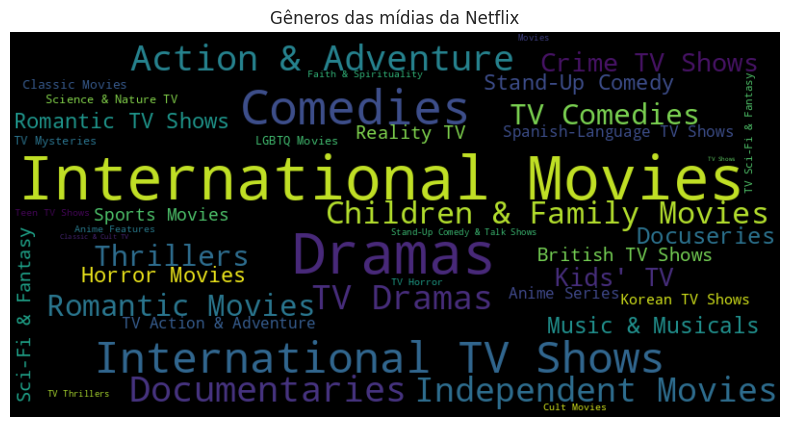

In [ ]:
# Criando uma nuvem de palavras para as mídias da Netflix
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(zip(gc['genre'], gc['listed_in'])))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Gêneros das mídias da Netflix')
plt.show()

In [ ]:
# Criando a cópia da coluna de países para tratamento
df_NotNullCtr = df['country'].copy()


In [ ]:
# Retirando valores nulos
df_NotNullCtr.dropna(inplace=True)

In [ ]:
# Separando os países para as mídias que possuem mais de uma origem
df_country = df_NotNullCtr.str.split(', ')
CtrExpandido = df_country.explode()

In [ ]:
# Criando um dataframe
countries_numb = CtrExpandido.value_counts()
CountriesPerProd = pd.DataFrame(countries_numb)

In [ ]:
CountriesPerProd

,country
United States,3689
India,1046
United Kingdom,804
Canada,445
France,393
...,...
Bermuda,1
Ecuador,1
Armenia,1
Mongolia,1


In [ ]:
# Formatando o dataframe
CountriesPerProd.reset_index(inplace=True)
CountriesPerProd.rename(columns={'index':'country',
                                 'country': 'productions'}, inplace=True)
CountriesPerProd

,country,productions
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Bermuda,1
123,Ecuador,1
124,Armenia,1
125,Mongolia,1


A nuvem de palavras para ilustrar essa distribuição mostrou grande destaque para países de língua inglesa, como os Estados Unidos, Canadá o Reino Unido, no entanto estrangeiros como França, Japão e, principalmente, Índia também aparecem proeminentemente.

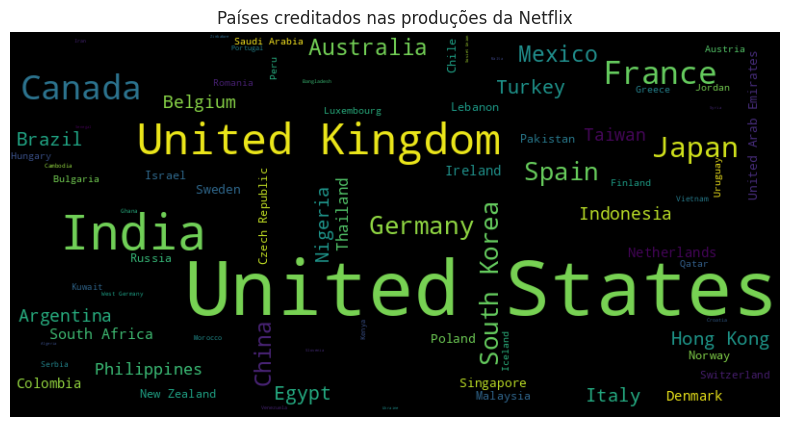

In [ ]:
# Criando uma nuvem de palavras para mostrar os países com maior número de produções
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(zip(CountriesPerProd['country'], CountriesPerProd['productions'])))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Países creditados nas produções da Netflix')
plt.show()

In [ ]:
# Criando uma cópia para limpar os dados de classificação indicativa
ratingValues = df['rating'].copy()
ratingValues

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [ ]:
# Retirando valores estranhos
ratingValues = ratingValues[~ratingValues.isin(['74 min', '84 min', '66 min'])]
ratingValues.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
# Agrupando classificações
classInd = ratingValues.value_counts()

In [ ]:
# Criando o dataframe
classInd = pd.DataFrame(classInd)

In [ ]:
# Formatando o dataframe
classInd.reset_index(inplace=True)
classInd.rename(columns={'index':'rating',
                        'rating': 'amount'}, inplace=True)
classInd

,rating,amount
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


O gráfico de barras mostrou que a maior parte dos programas está cadastrado como 'feito para adultos', 'feito para maiores de 14 anos' e 'não foi feito para crianças'; por outro lado, os menores valores representam programas de fantasia para maiores de 7 anos, 'extritamente proibido para menores de 17' e 'não cadastrado no sistema de classificação'. No geral, o gráfico aponta a presença de conteúdo feito para maiores de idades como sendo a maioria do que está presente na Netflix.

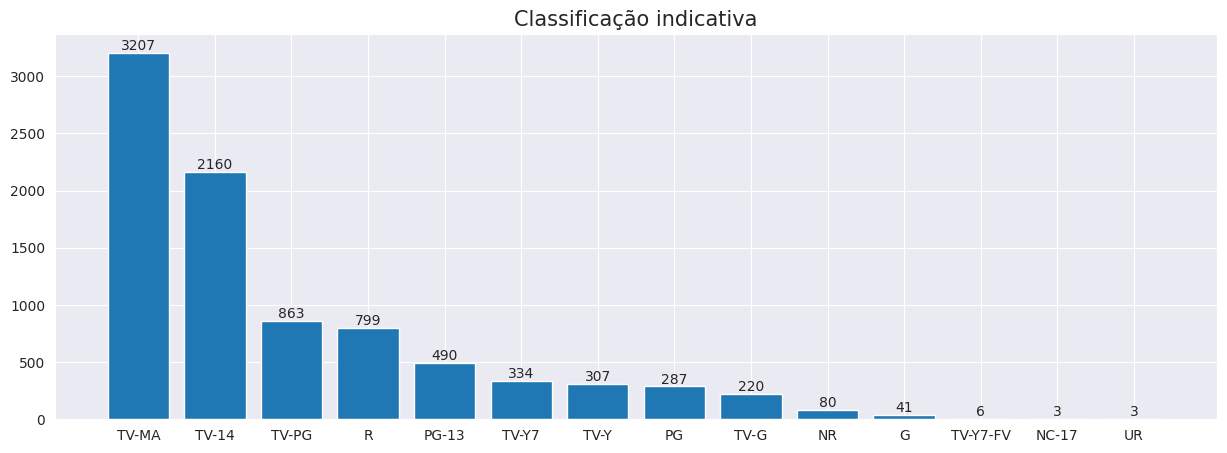

In [ ]:
# Gráfico de barras de classificação indicativa
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(classInd['rating'], classInd['amount'])
ax.bar_label(ax.containers[0])
#plt.bar(classInd['rating'], classInd['amount'])
plt.title('Classificação indicativa', fontsize = 15)

plt.show()

### Conclusão
- O conteúdo da Netflix, levando em consideração o recorte temporal da base, uma vez que a Netflix muda o catálogo constantemente, é mais voltado para adultos.
- O foco é a mídia produzida nos Estados Unidos, possuindo uma diferença de 3x mais do que o segundo lugar, ou seja, mesmo que os valores nulos da coluna 'country' fossem adicionados ao segundo país com mais conteúdo, os Estados Unidos continuariam com aproximadamente o dobro do segundo lugar.
- Apesar de 'filmes internacionais' estar no topo dos gêneros da Netflix, outros gêneros, como Drama, provavelmente o alcançariam caso não fossem separados por série.
- Há preferência por séries/filmes lançados recentemente, especialmente a partir de 2010, ao invés de séries/filmes mais antigos.
- Por fim, filmes representam mais da metade do conteúdo da Netflix.
